# Benchmark on the Ames housing dataset
Probably using linear regression or lasso

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
ames_data = pd.read_csv("AmesHousing.csv")

In [3]:
ames_data.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    2010       WD           Normal     215000  
1          NaN        0       6    2010       WD           Normal     105000  
2         Gar2    12500       6    2010       WD           Normal     172000  
3          NaN        0       4    2010       WD           Normal     244000  
4          NaN        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [4]:
y = ames_data['SalePrice']
ames_data['SalePrice'] = None

Impute missing values (using whatever the dumbest option available in SKL is)  
But no point inputing if the missingness is extreme (say > 25%)

In [5]:
def percent_null(pd_column):
    return sum(pd_column.isnull())/len(pd_column)

In [6]:
ames_perc_null = [percent_null(ames_data[col]) for col in ames_data.columns]
filtered_ames_data = ames_data.iloc[:,[e < .25 for e in ames_perc_null]]
ames_perc_null = [percent_null(filtered_ames_data[col]) for col in filtered_ames_data.columns]

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

ModuleNotFoundError: No module named 'sklearn'

In [72]:
# https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [69]:
df_imputer = DataFrameImputer()

In [73]:
filtered_imputed_ames = df_imputer.fit_transform(filtered_ames_data)

We're going to need to dummy-encode the categorical variables

In [74]:
ames_data_dummy = pd.get_dummies(filtered_imputed_ames)

In [75]:
from sklearn.manifold import TSNE
from sklearn.linear_model import ElasticNet

In [76]:
tsne = TSNE()
elastic_net = ElasticNet()

In [91]:
ames_tsne = pd.DataFrame(tsne.fit_transform(ames_data_dummy))

In [86]:
from vega import VegaLite

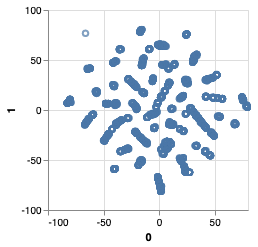

In [94]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": "point",
  "encoding": {
    "y": {"type": "quantitative", "field": "1"},
    "x": {"type": "quantitative", "field": "0"}
  }
}, ames_tsne)

In [78]:
ames_elastic = elastic_net.fit(X = ames_data_dummy, y = y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)